In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train,y_train),(X_test,y_test)  = mnist.load_data()

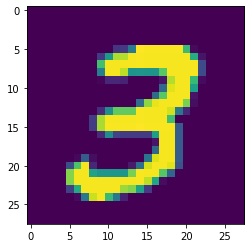

In [4]:
plt.imshow(X_train[7])

## Filtering out the Data for Faster Training on Smaller Dataset

In [8]:
y_test[1]

2

In [9]:
only_zeros = X_train[y_train==0]

In [10]:
only_zeros.shape

(5923, 28, 28)

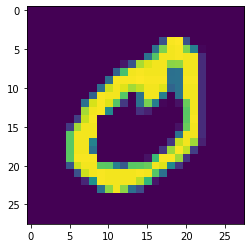

In [12]:
plt.imshow(only_zeros[1])

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape

In [14]:
np.random.seed(42)
tf.random.set_seed(42)
codings_size=100

In [15]:
discriminator = Sequential()
discriminator.add(Flatten(input_shape=[28,28]))
discriminator.add(Dense(150,activation='relu'))
discriminator.add(Dense(100,activation='relu'))
discriminator.add(Dense(1,activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy',optimizer='adam')

In [16]:
generator = Sequential()
generator.add(Dense(100,activation='relu',input_shape=[codings_size]))
generator.add(Dense(150,activation='relu'))
generator.add(Dense(28*28,activation='sigmoid'))
generator.add(Reshape([28,28]))

In [17]:
GAN = Sequential([generator, discriminator])

In [19]:
discriminator.trainable = False

In [20]:
GAN.compile(loss='binary_crossentropy',optimizer='adam')

In [23]:
GAN.layers[0].summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 150)               15150     
_________________________________________________________________
dense_5 (Dense)              (None, 784)               118384    
_________________________________________________________________
reshape (Reshape)            (None, 28, 28)            0         
Total params: 143,634
Trainable params: 143,634
Non-trainable params: 0
_________________________________________________________________


In [24]:
GAN.layers[1].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 150)               117750    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 132,951
Trainable params: 0
Non-trainable params: 132,951
_________________________________________________________________


## Setting up Training Batches

In [34]:
import tensorflow as tf

In [35]:
my_data=only_zeros

In [36]:
batch_size=32

In [37]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)

In [38]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.ShuffleDataset

In [40]:
dataset = dataset.batch(batch_size,drop_remainder=True).prefetch(1)

In [41]:
only_zeros.shape

(5923, 28, 28)

In [42]:
5923/32

185.09375

In [43]:
epochs = 1

In [53]:
generator,discriminator = GAN.layers

for epoch in range(epochs):
    print(f"Currently on Epoch {epoch+1}")
    i=0
    for X_batch in dataset:
        i+=1
        if i%100==0:
            print(f"\t Currently on batch number {i} of {len(my_data)//batch_size}")
            
        noise = tf.random.normal(shape=[batch_size,codings_size])
        gen_images = generator(noise)
            
        x_fake_vs_real = tf.concat([gen_images,tf.dtypes.cast(X_batch,tf.float32)],axis=0)
            
        y1 = tf.constant([[0]] * batch_size + [[1]] * batch_size)
            
        discriminator.trainable = True
            
        discriminator.train_on_batch(x_fake_vs_real,y1)
            
        noise = tf.random.normal(shape=[batch_size, codings_size])
            
        y2 = tf.constant([[1.]] * batch_size)
            
        discriminator.trainable=False
            
        GAN.train_on_batch(noise,y2)
print("Training Complete")            
            

Currently on Epoch 1
	 Currently on batch number 100 of 185
Training Complete


In [54]:
noise = tf.random.normal(shape=[10, codings_size])

In [55]:
noise.shape

TensorShape([10, 100])

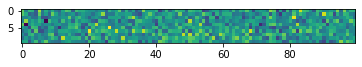

In [56]:
plt.imshow(noise)

In [57]:
image = generator(noise)

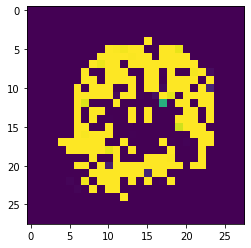

In [61]:
plt.imshow(image[9])